In [1]:
import keras

Using TensorFlow backend.
c:\python3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\python3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\python3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\python3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a s

In [2]:
from keras.datasets import imdb 
import numpy as np
np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

In [3]:
(tran_data,train_labels),(test_data,test_labels)=imdb.load_data( num_words=10000)


In [4]:
tran_data.shape,train_labels.shape,test_data.shape,test_labels.shape

((25000,), (25000,), (25000,), (25000,))

In [5]:
len(tran_data[1])

189

In [6]:
train_labels[0]

1

In [7]:
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [8]:
type(tran_data)

numpy.ndarray

In [9]:
max([max(sequence) for sequence in tran_data])

9999

In [10]:
word_index=imdb.get_word_index()

In [11]:
type(word_index)

dict

In [12]:
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])

In [13]:
reverse_word_index[11],tran_data[0][2],reverse_word_index[19],tran_data[0][3],reverse_word_index[13]

('this', 22, 'film', 16, 'was')

In [14]:
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in tran_data[0]])

In [15]:
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [16]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [17]:
sample_seq=[2,3,4]
vectorize_sequences(sample_seq,dimension=5)

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [77]:
for i, sequence in enumerate(sample_seq):
    print('i is ',i)
    print('sequence',sequence)

i is  0
sequence 2
i is  1
sequence 3
i is  2
sequence 4


In [18]:
x_train = vectorize_sequences(tran_data)

In [19]:
x_test=vectorize_sequences(test_data)

In [20]:
x_train[0],x_train.shape

(array([0., 1., 1., ..., 0., 0., 0.]), (25000, 10000))

In [21]:
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

In [22]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

W0807 09:43:04.147362  4084 deprecation_wrapper.py:119] From c:\python3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0807 09:43:04.521364  4084 deprecation_wrapper.py:119] From c:\python3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0807 09:43:04.552565  4084 deprecation_wrapper.py:119] From c:\python3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0807 09:43:04.695566  4084 deprecation_wrapper.py:119] From c:\python3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0807 09:43:04.726766  4084 deprecation_wrapper.py:119] From c:\python3\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The 

In [23]:
x_train.shape

(25000, 10000)

In [24]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [25]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

W0807 09:43:09.247584  4084 deprecation_wrapper.py:119] From c:\python3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 281us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3164 - val_acc: 0.8771
Epoch 7/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.0980 - acc: 0.9706 - val_loss: 0.3127 - 

In [26]:
history_dict=history.history

In [27]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [28]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Training and validation loss')

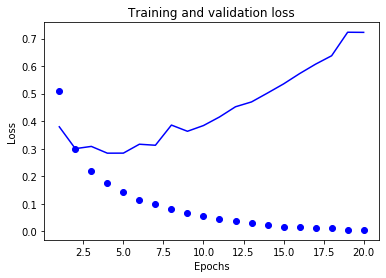

In [29]:
training_loss=history_dict['loss']
validation_loss=history_dict['val_loss']
epochs = range(1,len(training_loss)+1)

plt.plot(epochs,training_loss,'bo',label='training loss')
plt.plot(epochs,validation_loss,'b',label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [30]:
plt.clf()

<Figure size 432x288 with 0 Axes>

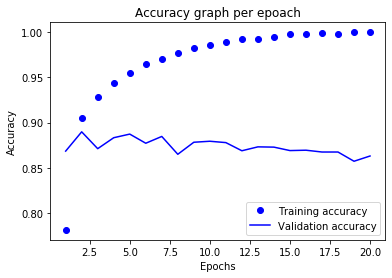

In [33]:
acc= history_dict['acc']
val_acc=history_dict['val_acc']
plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Accuracy graph per epoach')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [39]:
model= models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=4,batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 2s 91us/step - loss: 0.4470 - acc: 0.8240
Epoch 2/4
25000/25000 [==============================] - 2s 80us/step - loss: 0.2557 - acc: 0.9103
Epoch 3/4
25000/25000 [==============================] - 2s 77us/step - loss: 0.1969 - acc: 0.9302
Epoch 4/4
25000/25000 [==============================] - 2s 76us/step - loss: 0.1646 - acc: 0.9422


In [40]:
results= model.evaluate(x_test,y_test)

25000/25000 [==============================] - 3s 101us/step


In [41]:
results

[0.3170924593162537, 0.87544]

In [42]:
pre=model.predict(x_test)

In [43]:
pre

array([[0.29347718],
       [0.9996716 ],
       [0.936208  ],
       ...,
       [0.16637942],
       [0.15628898],
       [0.76391196]], dtype=float32)

In [46]:
from keras.datasets import reuters
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 10s 5us/step


In [47]:
len(train_data),len(test_data)

(8982, 2246)

In [48]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [49]:
word_index=reuters.get_word_index()

557056/550378 [==============================] - 2s 3us/step


In [57]:
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])
decode_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [58]:
decode_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [59]:
train_labels[0]

3

In [72]:
max([max(sequence) for sequence in train_data])

9999

In [86]:
train_data_g=train_data[1:3]
for i, sequence in enumerate(train_data_g):
    print('i is ',i)
    print('sequence',sequence)

i is  0
sequence [1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]
i is  1
sequence [1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59, 89, 90, 67, 1390, 55, 2678, 92, 617, 80, 1274, 46, 905, 220, 13, 4, 346, 48, 235, 629, 5, 211, 5, 1118, 7, 2, 81, 5, 187, 11, 15, 9, 1709, 201, 5, 47, 3615, 18, 478, 4514, 5, 1118, 7, 232, 2, 71, 5, 160, 63, 11, 9, 2, 81, 5, 102, 59, 11, 17, 12]


In [87]:
train_data_g

array([list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59, 89, 90, 67, 1390, 55, 2678, 92, 617, 80, 1274, 46, 905, 220, 13, 4, 346, 48, 235, 629, 5, 211, 5, 1118, 7, 2, 81, 5, 187, 11, 15, 9, 1709, 201, 5, 47, 3615, 18, 478, 4514, 5, 1118, 7, 232, 2, 71, 5, 160, 63, 11, 9, 2, 81, 5, 102, 59, 11, 17, 12])],
      dtype=object)

In [89]:
import numpy as np
def vectorize_sequences(sequences,dimension=10000):
    results= np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence]=1
    return results
    

In [123]:
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [124]:
def to_one_hot(labels,dimensions=46):
    results=np.zeros((len(labels),dimensions))
    for i, label in enumerate(labels):
        results[i,label]=1
    return results

In [125]:
one_hot_train_labels=to_one_hot(train_labels)
one_hot_test_labels=to_one_hot(test_labels)

In [126]:
max(train_labels)

45

In [127]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [128]:
one_hot_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [129]:
one_hot_test_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [130]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels=to_categorical(train_labels)
one_hot_test_labels=to_categorical(test_labels)

In [131]:
from keras import models
from keras import layers
model= models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [132]:
x_val=x_train[:1000]
partial_x_train=x_train[1000:]

y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

In [133]:
history=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 164us/step - loss: 2.6135 - acc: 0.4644 - val_loss: 1.7289 - val_acc: 0.6350
Epoch 2/20
7982/7982 [==============================] - 1s 114us/step - loss: 1.4074 - acc: 0.7082 - val_loss: 1.2744 - val_acc: 0.7310
Epoch 3/20
7982/7982 [==============================] - 1s 116us/step - loss: 1.0425 - acc: 0.7788 - val_loss: 1.1032 - val_acc: 0.7640
Epoch 4/20
7982/7982 [==============================] - 1s 117us/step - loss: 0.8179 - acc: 0.8321 - val_loss: 1.0267 - val_acc: 0.7820
Epoch 5/20
7982/7982 [==============================] - 1s 118us/step - loss: 0.6505 - acc: 0.8631 - val_loss: 0.9515 - val_acc: 0.8070
Epoch 6/20
7982/7982 [==============================] - 1s 125us/step - loss: 0.5295 - acc: 0.8904 - val_loss: 0.9204 - val_acc: 0.8120
Epoch 7/20
7982/7982 [==============================] - 1s 118us/step - loss: 0.4211 - acc: 0.9114 - val_loss: 0.9000 - val_acc: 0.8130


In [134]:
import matplotlib.pyplot as plt
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

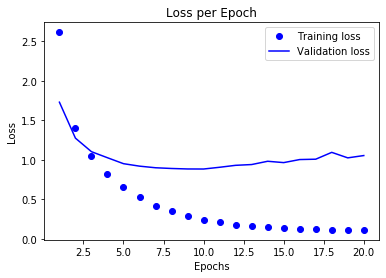

In [135]:
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1, len(loss)+1)
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.show()

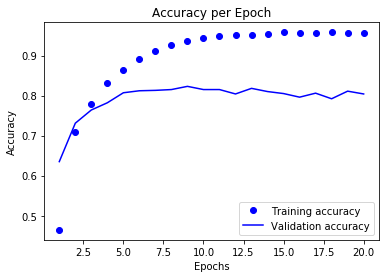

In [136]:
acc=history.history['acc']
val_acc=history.history['val_acc']
epochs=range(1, len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.legend()
plt.show()

In [137]:
# Retrain model from scratch for 9 epochs
model= models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=512,validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 158us/step - loss: 2.6983 - acc: 0.5244 - val_loss: 1.8312 - val_acc: 0.6480
Epoch 2/9
7982/7982 [==============================] - 1s 117us/step - loss: 1.4949 - acc: 0.6928 - val_loss: 1.3635 - val_acc: 0.7010
Epoch 3/9
7982/7982 [==============================] - 1s 118us/step - loss: 1.0956 - acc: 0.7628 - val_loss: 1.1740 - val_acc: 0.7380
Epoch 4/9
7982/7982 [==============================] - 1s 118us/step - loss: 0.8594 - acc: 0.8186 - val_loss: 1.0697 - val_acc: 0.7700
Epoch 5/9
7982/7982 [==============================] - 1s 118us/step - loss: 0.6855 - acc: 0.8611 - val_loss: 0.9788 - val_acc: 0.7860
Epoch 6/9
7982/7982 [==============================] - 1s 120us/step - loss: 0.5455 - acc: 0.8887 - val_loss: 0.9277 - val_acc: 0.8060
Epoch 7/9
7982/7982 [==============================] - 1s 118us/step - loss: 0.4362 - acc: 0.9110 - val_loss: 0.9035 - val_acc: 0.8100
Epoch 8

In [139]:
results=model.evaluate(x_test,one_hot_test_labels)

2246/2246 [==============================] - 0s 125us/step


In [140]:
results

[0.9932897952870396, 0.7845057881207521]

In [141]:
predictions=model.predict(x_test)

In [142]:
predictions.shape

(2246, 46)

In [145]:
np.sum(predictions[2])

1.0000002

In [149]:
np.argmax(predictions[56])

26

In [150]:
y_train = np.array(train_labels)

In [151]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [154]:
y_test = np.array(test_labels)

In [155]:
y_test

array([ 3, 10,  1, ...,  3,  3, 24], dtype=int64)

In [159]:
model= models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['acc'])
model.fit(x_train,y_train,epochs=9,batch_size=512)

Epoch 1/9
8982/8982 [==============================] - 2s 170us/step - loss: 2.5487 - acc: 0.5326
Epoch 2/9
8982/8982 [==============================] - 1s 118us/step - loss: 1.3673 - acc: 0.7147
Epoch 3/9
8982/8982 [==============================] - 1s 117us/step - loss: 1.0219 - acc: 0.7769
Epoch 4/9
8982/8982 [==============================] - 1s 118us/step - loss: 0.8010 - acc: 0.8245 0s - loss: 0.8290 -
Epoch 5/9
8982/8982 [==============================] - 1s 119us/step - loss: 0.6293 - acc: 0.8702
Epoch 6/9
8982/8982 [==============================] - 1s 123us/step - loss: 0.5045 - acc: 0.8985
Epoch 7/9
8982/8982 [==============================] - 1s 125us/step - loss: 0.4002 - acc: 0.9174
Epoch 8/9
8982/8982 [==============================] - 1s 119us/step - loss: 0.3272 - acc: 0.9313
Epoch 9/9
8982/8982 [==============================] - 1s 114us/step - loss: 0.2725 - acc: 0.9403


In [160]:
predictions=model.predict(x_test)

In [162]:
predictions.shape

(2246, 46)

In [166]:
np.argmax(predictions[22])

3